In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
import pickle
import tensorflow as tf
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

C:\Users\Ayman Mohamed\anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
[nltk_data] Downloading package stopwords to C:\Users\Ayman
[nltk_data]     Mohamed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Ayman
[nltk_data]     Mohamed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
with open("Dataset_After_Processing.pkl", "rb") as DS:
    Final_Preprocced_Data = pickle.load(DS)

In [3]:
X = []
Y = []
for i in range(len(Final_Preprocced_Data)):
    X.append(Final_Preprocced_Data[i][0])
    Y.append(Final_Preprocced_Data[i][1])

In [4]:
yy = set(Y)
Classes = sorted(list(yy))
ClassesCodes = {}
for i in range(len(Classes)):
    Class = Classes[i]
    ClassesCodes[Class] = np.array(i)

y = []
for i in range(len(Y)):
    Class = Y[i]
    y.append(ClassesCodes[Class])

y = np.array(y)
y.shape

(244652,)

In [5]:
Classes = sorted(list(yy))

In [6]:
ClassesCodes = {}
for i in range(len(Classes)):
    Class = Classes[i]
    ClassesCodes[Class] = np.array(i)

In [7]:
ClassesCodes

{'AE': array(0),
 'BH': array(1),
 'DZ': array(2),
 'EG': array(3),
 'IQ': array(4),
 'JO': array(5),
 'KW': array(6),
 'LB': array(7),
 'LY': array(8),
 'MA': array(9),
 'OM': array(10),
 'PL': array(11),
 'QA': array(12),
 'SA': array(13),
 'SD': array(14),
 'SY': array(15),
 'TN': array(16),
 'YE': array(17)}

In [8]:
y = []
for i in range(len(Y)):
    Class = Y[i]
    y.append(ClassesCodes[Class])

In [9]:
NumberOfData_PerClass = [0]*len(Classes)
for Data in Y:
    Index = Classes.index(Data)
    NumberOfData_PerClass[Index] += 1

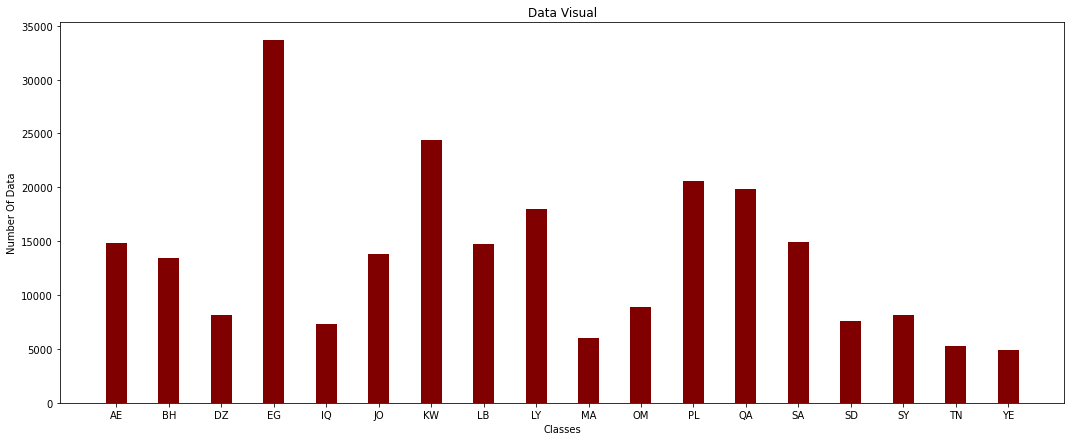

In [10]:
fig = plt.figure(figsize = (18, 7))
 
plt.bar(Classes, NumberOfData_PerClass, color ='maroon',width = 0.4)
 
plt.xlabel("Classes")
plt.ylabel("Number Of Data")
plt.title("Data Visual")
plt.show()

# Machine Learning Model

In [17]:
y = np.array(y)

In [18]:
tfidfconverter = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.7, stop_words=stopwords.words('arabic'))
X_Vec = tfidfconverter.fit_transform(X).toarray()

C:\Users\Ayman Mohamed\anaconda3\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_Vec, y, test_size=0.2, random_state=0,shuffle=True)

In [20]:
print("Train Shape: ",X_train.shape)
print("Test Shape: ",X_test.shape)
print("Target Train Shape: ",y_train.shape)
print("Target Test Shape: ",y_test.shape)

Train Shape:  (195721, 1000)
Test Shape:  (48931, 1000)
Target Train Shape:  (195721,)
Target Test Shape:  (48931,)


In [29]:
classifierRandom = RandomForestClassifier(n_estimators=300,max_depth=15, random_state=0)

In [30]:
classifierRandom.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [31]:
y_pred = classifierRandom.predict(X_test)

In [32]:
Correct = 0
Total = len(y_pred)
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        Correct += 1

Acc = round((Correct*100)/Total,3)
print("Accuracy: ",Acc,"%")

Accuracy:  28.918 %


In [33]:
with open('ML_Model.pkl', 'wb') as f:
    pickle.dump(classifierRandom, f)

# Deep Learning Model

In [34]:
max_len = 90

In [35]:
#ID Each word in our dataset
word2ID = {}
ID = 1
for data in X:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2ID.keys():
            word2ID[word] = ID
            ID += 1

In [36]:
with open('Word2ID.pkl', 'wb') as f:
    pickle.dump(word2ID, f)

In [ ]:
with open("Word2ID.pkl", "rb") as DS:
    word2ID = pickle.load(DS)

In [37]:
Vocab_size = len(word2ID)

In [ ]:
#Replace Each Word with it's corrosponding ID
X_Vector = []
for data in X:
    Vec = []
    words = nltk.word_tokenize(data)
    for word in words:
        Id = word2ID[word]
        Vec.append(Id)
    X_Vector.append(Vec)

In [ ]:
X_Vector = tf.keras.preprocessing.sequence.pad_sequences(X_Vector, maxlen=max_len)

In [ ]:
X_Vector = np.array(X_Vector,dtype=np.int32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Vector, y, test_size=0.2, random_state=0,shuffle=True)b

In [ ]:
print("Train Shape: ",X_train.shape)
print("Test Shape: ",X_test.shape)
print("Target Train Shape: ",y_train.shape)
print("Target Test Shape: ",y_test.shape)

In [ ]:
embed_size = 128
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(Vocab_size, embed_size, input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.LSTM(units=256, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.LSTM(units=128, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.LSTM(units=64, activation='tanh',return_sequences=True))
model.add(tf.keras.layers.LSTM(units=32, activation='tanh'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=len(Classes), activation='softmax',activity_regularizer=tf.keras.regularizers.L1(0.01)))

In [ ]:
base_path = "./"
patience = 20
early_stop = EarlyStopping('val_loss', patience=patience)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,patience=int(patience/4), verbose=1)
trained_models_path = base_path + 'LSTM'
model_names = trained_models_path+"-"+"TEXT-Classifictaion_V2"+ '-{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate= 0.001 , momentum=0.9,nesterov=True)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(X_train, y_train, epochs=10000, batch_size=128 , validation_split=0.2,verbose=1,callbacks=callbacks,shuffle=True)